#                                             PART-1
#####################################################################################################################

In [1]:
# Read Fashion MNIST dataset
import numpy as np
import util_mnist_reader
import pandas

X_train, y_train = util_mnist_reader.load_mnist('/Users/prudhveer/Desktop/Into to Machine Learning/data_with_notebook/data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('/Users/prudhveer/Desktop/Into to Machine Learning/data_with_notebook/data/fashion', kind='t10k')
# Your code goes here . . .


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)


In [2]:
X_train=np.asarray(X_train)
X_train=X_train/255.0
y_train=np.asarray(y_train)
y_123=y_train
y_train=np.asarray(y_train)
y_train = pandas.get_dummies(y_train)
y_train=np.asarray(y_train)
#from keras.utils import np_utils
#y_train = np_utils.to_categorical(y_train)
#print(y_train)
print(y_123)

X_test=np.asarray(X_test)
X_test=X_test/255.0
y_test=np.asarray(y_test)
y_456=y_test
y_test=np.asarray(y_test)
y_test = pandas.get_dummies(y_test)
y_test=np.asarray(y_test)
#y_test = to_categorical(y_test, 10)
#y_test = np_utils.to_categorical(y_test)
print (y_456)


[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [3]:
X=X_train
T=y_train
T.shape


(60000, 10)

In [15]:
samples = X.shape[0] 
features = X.shape[1] 
hidden_nodes = 512
classes = 10

# randomly initialize weights
W1 = np.random.randn(features, hidden_nodes)
b1 = np.random.randn(hidden_nodes)
W2 = np.random.randn(hidden_nodes, classes)
b2 = np.random.randn(classes)

alpha = 10e-6
costs = []
accuracy= []
for epoch in range(150):
    
    #####Front Propagation########
    A = sigmoid(X.dot(W1) + b1) 
    Y = softmax(A.dot(W2) + b2) 
    ######Back Propagation ############
    delta2 = (Y - T)
    delta1 = ((delta2).dot(W2.T) * A * (1 - A))

    W2 -= alpha * A.T.dot(delta2)
    b2 -= alpha * (delta2).sum(axis=0)

    W1 -= alpha * X.T.dot(delta1)
    b1 -= alpha * (delta1).sum(axis=0)

    if epoch % 10 == 0:
        loss = -1/60000*np.sum(T * np.log(Y))
        print('Loss function value: ', loss)
        costs.append(loss)
        #print(Y)
        predictions = np.argmax(Y, axis=1)
        #print(predictions)
        accurac=sum(y_123==predictions)/60000
        accuracy.append(accurac)
     
        print('Training Accuracy after ',epoch,' iterations : ',accurac*100)
    


Loss function value:  21.463904830558807
Training Accuracy after  0  iterations :  15.110000000000001
Loss function value:  5.6293639272374785
Training Accuracy after  10  iterations :  52.99166666666667
Loss function value:  4.95418857956858
Training Accuracy after  20  iterations :  58.10333333333333
Loss function value:  2.3766386049177117
Training Accuracy after  30  iterations :  67.16333333333333
Loss function value:  3.0437540842813893
Training Accuracy after  40  iterations :  69.62
Loss function value:  2.678812526473803
Training Accuracy after  50  iterations :  70.125
Loss function value:  1.595063154733021
Training Accuracy after  60  iterations :  74.32333333333332
Loss function value:  2.788878642002924
Training Accuracy after  70  iterations :  66.86999999999999
Loss function value:  2.3014587872692807
Training Accuracy after  80  iterations :  71.595
Loss function value:  2.1202969379281935
Training Accuracy after  90  iterations :  74.46000000000001
Loss function value

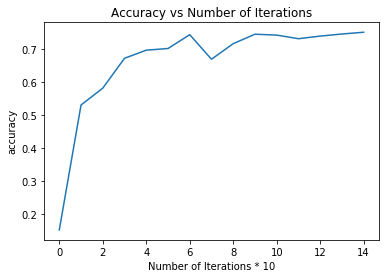

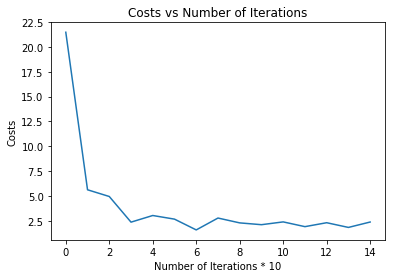

In [16]:
import matplotlib.pyplot as plt


plt.plot(accuracy)
plt.title("Accuracy vs Number of Iterations")
plt.xlabel("Number of Iterations * 10")
plt.ylabel("accuracy")
plt.show()


plt.plot(costs)
plt.title("Costs vs Number of Iterations")
plt.xlabel("Number of Iterations * 10")
plt.ylabel("Costs")
plt.show()

In [17]:

def forwardpropogation(X,W1,b1,W2,b2):
    A = sigmoid(X.dot(W1) + b1) 
    Y = softmax(A.dot(W2) + b2) 
    return A,Y  

def cal_acc(actual_y,predictions,n):
    acc=sum(actual_y==predictions)/n
    return acc


test_samples = X_test.shape[0]
print("Number of test samples:",test_samples)
A_test,Y_tests=forwardpropogation(X_test,W1,b1,W2,b2)
pred1 = np.argmax(Y_tests, axis=1)
acc=cal_acc(y_456,pred1,test_samples)
print("Test Accuracy with the current Model:", acc*100)

Number of test samples: 10000
Test Accuracy with the current Model: 74.53


In [18]:
from sklearn.metrics import confusion_matrix
confused_matrix = confusion_matrix(y_456.flatten(), pred1.flatten())


In [19]:
confused_matrix

array([[880,  16,  19,  25,  18,   7,  11,   1,  23,   0],
       [  9, 933,   4,  25,  22,   1,   2,   1,   3,   0],
       [ 45,  12, 469,  12, 412,   4,  22,   0,  24,   0],
       [114,  43,   8, 671, 136,   6,   7,   2,  12,   1],
       [  5,   6,  30,   6, 925,   6,  10,   0,  12,   0],
       [  3,   0,   0,   2,   3, 838,   0,  71,  26,  57],
       [288,  17,  91,  19, 395,  11, 127,   1,  50,   1],
       [  0,   0,   0,   0,   0,  88,   0, 842,   8,  62],
       [ 25,   4,   6,  12,  22,  22,   3,  17, 886,   3],
       [  2,   0,   0,   1,   1,  41,   1,  66,   6, 882]])

#                                          PART 2 
#####################################################################################################################


In [71]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Read Fashion MNIST dataset

import util_mnist_reader
X_train, y_train = util_mnist_reader.load_mnist('/Users/prudhveer/Desktop/Into to Machine Learning/data_with_notebook/data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('/Users/prudhveer/Desktop/Into to Machine Learning/data_with_notebook/data/fashion', kind='t10k')

# Your code goes here . . .
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train[0].shape
X_train = X_train.astype('float32')
X_train /= 255.0
X_test = X_test.astype('float32')
X_test /= 255.0
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,10)
print(y_train.shape)
y_test = to_categorical(y_test,10)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
(60000, 10)
(10000, 10)


In [72]:
# Importing Keras libraries 
import keras
from keras.models import Sequential
from keras.layers import Dense
# Initialising the NN
classifier = Sequential()

# Adding input layer and  first hidden layer
classifier.add(Dense(512,activation = 'relu',input_shape=(784,)))
# Adding second hidden layer
classifier.add(Dense(256,activation = 'relu'))
# Adding  output layer
classifier.add(Dense(10,activation = 'softmax'))
# Compiling NN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 30, validation_data = (X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 31s 520us/step - loss: 0.4744 - accuracy: 0.8275 - val_loss: 0.4019 - val_accuracy: 0.8574
Epoch 2/30
60000/60000 [==============================] - 34s 571us/step - loss: 0.3653 - accuracy: 0.8665 - val_loss: 0.3884 - val_accuracy: 0.8603
Epoch 3/30
60000/60000 [==============================] - 35s 588us/step - loss: 0.3312 - accuracy: 0.8775 - val_loss: 0.3822 - val_accuracy: 0.8668
Epoch 4/30
60000/60000 [==============================] - 34s 575us/step - loss: 0.3074 - accuracy: 0.8864 - val_loss: 0.3919 - val_accuracy: 0.8600
Epoch 5/30
60000/60000 [==============================] - 35s 584us/step - loss: 0.2935 - accuracy: 0.8907 - val_loss: 0.3637 - val_accuracy: 0.8774
Epoch 6/30
60000/60000 [==============================] - 36s 594us/step - loss: 0.2809 - accuracy: 0.8949 - val_loss: 0.3818 - val_accuracy: 0.8753
Epoch 7/30
60000/60000 [==============================] 

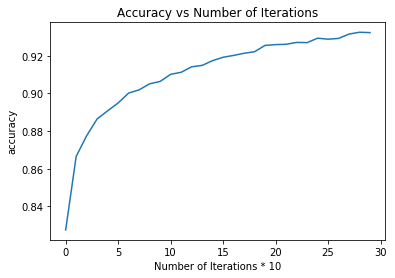

In [74]:
plt.plot(history.history['accuracy'])
plt.title("Accuracy vs Number of Iterations")
plt.xlabel("Number of Iterations * 10")
plt.ylabel("accuracy")
plt.show()

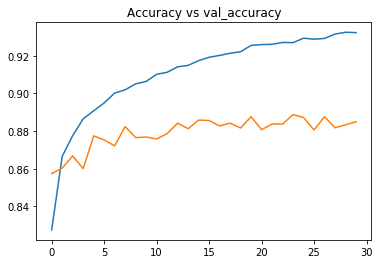

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs val_accuracy")
plt.show()



In [29]:
score = classifier.evaluate(X_test,y_test)
score

10000/10000 [==============================] - 1s 52us/step


[0.5687370408773422, 0.8812999725341797]

In [30]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
confused_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


In [31]:
confused_matrix

array([[826,   4,  12,  39,   1,   1, 112,   0,   5,   0],
       [  6, 973,   0,  14,   6,   0,   0,   0,   1,   0],
       [ 49,   1, 830,  14,  68,   0,  37,   0,   1,   0],
       [ 31,   5,   6, 940,   6,   0,  10,   0,   2,   0],
       [ 40,   0, 112,  61, 765,   0,  21,   0,   1,   0],
       [  1,   0,   0,   1,   0, 965,   0,  15,   0,  18],
       [174,   0,  95,  36,  93,   0, 600,   0,   2,   0],
       [  0,   0,   0,   0,   0,  10,   0, 973,   0,  17],
       [ 22,   1,   1,   4,   1,   3,   2,   3, 963,   0],
       [  1,   0,   0,   0,   0,   5,   1,  48,   0, 945]])

#                                          PART 3 
#####################################################################################################################


In [57]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
# Read Fashion MNIST dataset

import util_mnist_reader
X_train, y_train = util_mnist_reader.load_mnist('/Users/prudhveer/Desktop/Into to Machine Learning/data_with_notebook/data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('/Users/prudhveer/Desktop/Into to Machine Learning/data_with_notebook/data/fashion', kind='t10k')
abc = X_test
# Your code goes here . . .

In [59]:
# Importing the Keras libraries 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [60]:
classifier1 = Sequential()
# Convolution
classifier1.add(Conv2D(32, (2, 2), input_shape = (28, 28, 1), activation = 'relu'))
# Pooling
classifier1.add(MaxPooling2D(pool_size = (2, 2)))
# Flattening
classifier1.add(Flatten())
# Full connection
classifier1.add(Dense(256,activation = 'relu',input_shape=(784,)))
classifier1.add(Dense(10,activation = 'softmax'))
# Compiling CNN
classifier1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
classifier1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               1384704   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 1,387,434
Trainable params: 1,387,434
Non-trainable params: 0
_________________________________________________________________


In [61]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_test = X_test.astype('float32')
X_test /= 255.0

X_train = X_train.astype('float32')
X_train /= 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

history = classifier1.fit(X_train, y_train, batch_size = 10, epochs = 10 , validation_data = (X_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.3721 - accuracy: 0.8660 - val_loss: 0.3207 - val_accuracy: 0.8803
Epoch 2/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2540 - accuracy: 0.9066 - val_loss: 0.2738 - val_accuracy: 0.8971
Epoch 3/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.2048 - accuracy: 0.9244 - val_loss: 0.2785 - val_accuracy: 0.9015
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1702 - accuracy: 0.9373 - val_loss: 0.2788 - val_accuracy: 0.9044
Epoch 5/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1397 - accuracy: 0.9470 - val_loss: 0.3047 - val_accuracy: 0.9009
Epoch 6/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.1149 - accuracy: 0.9570 - val_loss: 0.3034 - val_accuracy: 0.9095
Epoch 7/10
60000/60000 [==============================] - 109s

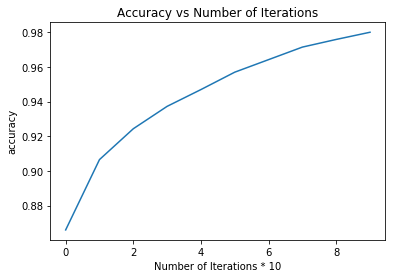

In [66]:
plt.plot(history.history['accuracy'])
plt.title("Accuracy vs Number of Iterations")
plt.xlabel("Number of Iterations * 10")
plt.ylabel("accuracy")
plt.show()

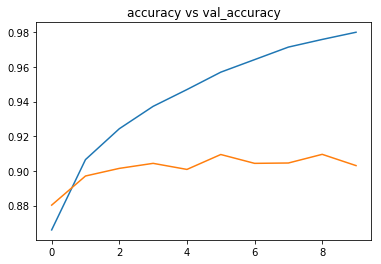

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy vs val_accuracy")
plt.show()

In [69]:
y_pred = classifier1.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
confused_matrix = matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


In [70]:
confused_matrix

array([[819,   0,   7,  23,   3,   1, 142,   0,   5,   0],
       [  1, 979,   0,  13,   2,   0,   4,   0,   1,   0],
       [ 23,   1, 824,  10,  65,   0,  76,   0,   1,   0],
       [ 19,   7,   8, 917,  14,   0,  30,   0,   5,   0],
       [ 12,   2,  40,  40, 849,   1,  54,   0,   2,   0],
       [  2,   0,   0,   0,   0, 989,   0,   1,   0,   8],
       [ 87,   3,  45,  16,  43,   0, 796,   0,   9,   1],
       [  3,   0,   0,   0,   0,  72,   0, 902,   0,  23],
       [  5,   0,   0,   5,   0,   4,   5,   0, 981,   0],
       [  1,   0,   0,   0,   0,   7,   0,  22,   3, 967]])